A: An overview of the dataset.

Here, we aim to gain some general information about the dataset before starting our exploration journey.

First let's import the file into a dataframe.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from matplotlib.colors import LogNorm, Normalize

In [2]:
data=pd.read_pickle('data_385k.pkl',compression='zip')
data

,alcohol_by_volume,barcode,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_per_portion,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,...,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit
0,0.0,8001772000030,NaN,NaN,75.00,37.50,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,7610809001066,NaN,NaN,1.50,1.13,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,8002530159021,NaN,NaN,52.68,NaN,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,3033715065788,NaN,NaN,70.40,11.97,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,7610848492740,NaN,NaN,37.00,7.40,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385379,0.0,7640145040283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385380,0.0,7640147023628,850.0,mg,48.60,9.72,g,NaN,NaN,NaN,...,45.0,mg,10.5,mg,500.0,mg,NaN,NaN,37.5,mg
385381,0.0,3046920021593,NaN,NaN,22.00,NaN,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385382,0.0,4044889004335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now that we have imported the dataset, let's check the number of rows and columns:

In [3]:
data.shape

(385384, 99)

In [4]:
data.head() # Displaying first entries

,alcohol_by_volume,barcode,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_per_portion,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,...,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit
0,0.0,8001772000030,NaN,NaN,75.00,37.50,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,7610809001066,NaN,NaN,1.50,1.13,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,8002530159021,NaN,NaN,52.68,NaN,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,3033715065788,NaN,NaN,70.40,11.97,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,7610848492740,NaN,NaN,37.00,7.40,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data_type=data.dtypes.unique() # Check the different data types
data_type

array([dtype('float64'), dtype('O'), dtype('int64')], dtype=object)

In [6]:
list_float=list(data.select_dtypes(include=['float64'])) # Creating list for all dtype
list_int=list(data.select_dtypes(include=['int64']))
list_object=list(data.select_dtypes(include=['O']))

B. Preliminary Exploratory Data Analysis

In [7]:
# Checking duplicated rows 
data.loc[data.duplicated(), :]

,alcohol_by_volume,barcode,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_per_portion,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,...,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit
374884,0.0,7613404363317,NaN,NaN,17.0,60.00,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374885,0.0,7613269343509,NaN,NaN,1.0,1.80,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374886,0.0,2110012004502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374887,0.0,2159171001007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374888,0.0,7624841230186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385379,0.0,7640145040283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385380,0.0,7640147023628,850.0,mg,48.6,9.72,g,NaN,NaN,NaN,...,45.0,mg,10.5,mg,500.0,mg,NaN,NaN,37.5,mg
385381,0.0,3046920021593,NaN,NaN,22.0,NaN,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385382,0.0,4044889004335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Indeed, we can see that there are many dupliacted rows, so now let's remove them

In [8]:
# Removing the rows
df=data.drop_duplicates().reset_index() # Resetting the index after dropping the rows
df.shape

(374884, 100)

As expected, the shape of this new Data Frame is quite different. Now let's show the proportion of missing values in the data using appropriate visualizations and numerical summaries.

In [9]:
percent=(df.isnull().sum()/df.shape[0]*100).to_frame() # Computing the percentage of null valuesin each columns
percent.columns=['Percentage of null values']
percent

,Percentage of null values
index,0.000000
alcohol_by_volume,0.000000
barcode,0.000000
calcium_per_hundred,29.350412
calcium_unit,29.321870
...,...
vitamin_c_ascorbic_acid_unit,46.634426
vitamin_d_d2_d3_international_units_per_hundred,82.121403
vitamin_d_d2_d3_international_units_unit,82.121136
zinc_per_hundred,97.728631


We now have a DataFrame with the proportion of null values in each columns.

Now, let's see the percentage of null values in the whole dataframe.

In [10]:
percent['Percentage of null values'].mean()

59.7651673584362

As you can see above, there is approxivatively 60% of null values in the dataframe.


So our goal will be to replace those null values. We can suppose that in the numerical columns, the nul values can be replaced by the median of the whole column. And for the 'unit' columns we can replace the null values with the other unit of the columns

In [11]:
for column in df:
    df[list_object]=df[list_object].fillna(method='ffill')
for column in df:
    df[list_object]=df[list_object].fillna(method='bfill')

In [12]:
df[list_float]=df[list_float].fillna(value=df[list_float].median())

In [13]:
df.head()

,index,alcohol_by_volume,barcode,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_per_portion,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,...,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit
0,0,0.0,8001772000030,36.0,mg,75.00,37.50,g,0.0,mg,...,1.43,mg,0.52,mg,0.0,mg,0.0,IU,2.73,mg
1,1,0.0,7610809001066,36.0,mg,1.50,1.13,g,0.0,mg,...,1.43,mg,0.52,mg,0.0,mg,0.0,IU,2.73,mg
2,2,0.0,8002530159021,36.0,mg,52.68,15.60,g,0.0,mg,...,1.43,mg,0.52,mg,0.0,mg,0.0,IU,2.73,mg
3,3,0.0,3033715065788,36.0,mg,70.40,11.97,g,0.0,mg,...,1.43,mg,0.52,mg,0.0,mg,0.0,IU,2.73,mg
4,4,0.0,7610848492740,36.0,mg,37.00,7.40,g,0.0,mg,...,1.43,mg,0.52,mg,0.0,mg,0.0,IU,2.73,mg


In [14]:
df.shape # Checking the shape of the new DataFrame

(374884, 100)

The shape remains the same, as we just replaced the null values and we didn't drop any rows or columns.

Let's now plot the proportion of different Country and Unit.

In [15]:
total_country=df.groupby(['country']).country.count()
total_unit=df.groupby(['unit']).unit.count()

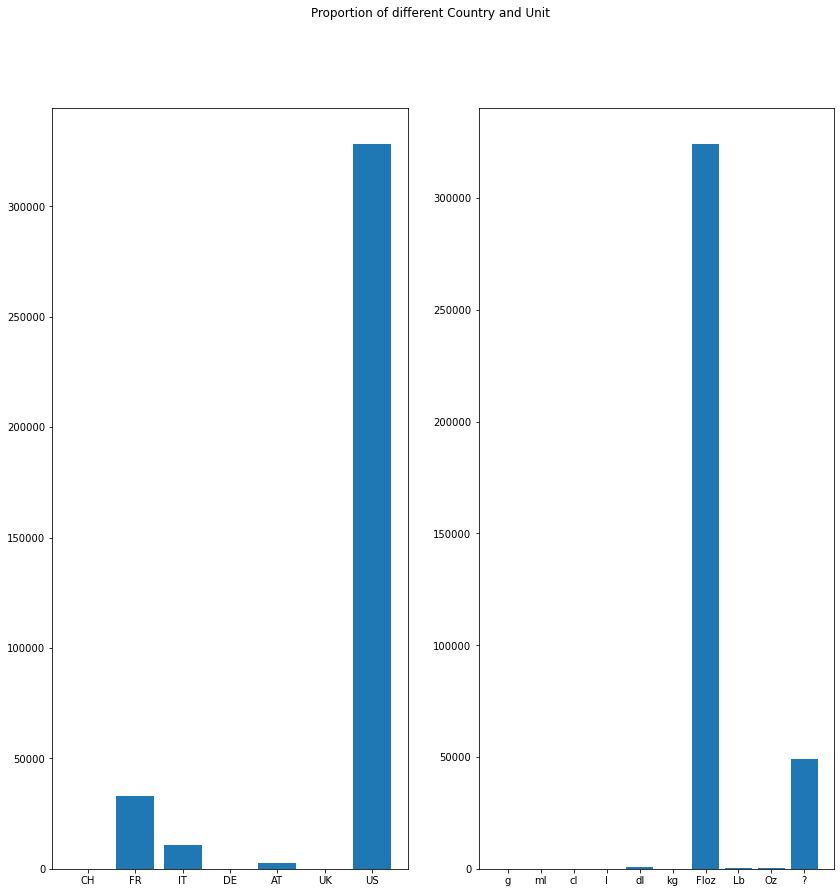

In [16]:
country=df['country'].unique()
unit=df.unit.unique()

fig, (ax1,ax2)=plt.subplots(1,2, figsize=(14,14))
fig.suptitle('Proportion of different Country and Unit')

ax1.bar(country,total_country)
ax2.bar(unit,total_unit)

plt.show()

As we can see above, we plotted well those statistics. 

So now, let's provide descriptive statistics and informative plots of the numerical variables.

In [17]:
# First let's see the max min and mean values for eache colulmns
described=df[list_float].describe().loc[['mean','min','max']].T
described

,mean,min,max
alcohol_by_volume,0.027911,0.0,57.90
calcium_per_hundred,92.977059,0.0,684000.00
carbohydrates_per_hundred,33.269419,0.0,6400.00
carbohydrates_per_portion,15.701742,0.0,150.50
cholesterol_per_hundred,42.524086,0.0,250000.00
copper_cu_per_hundred,0.528046,0.0,16483.52
energy_kcal_per_hundred,271.953047,0.0,39600.00
energy_kcal_per_portion,127.852935,0.0,1508.00
energy_per_hundred,1137.344686,0.0,165686.40
energy_per_portion,533.353441,0.0,5212.00


Now, we will try to adress unrealistic errors, that we will find in the per hundred columns.

In [18]:
per_hundred=pd.Series(list_float)
per_hundred_list=per_hundred[per_hundred.str.contains('_per_hundred')].tolist()
len(per_hundred_list)

37

In [19]:
unit=pd.Series(list_object)
unit_list=unit[unit.str.contains('_unit')].tolist()
del(unit_list[14])
del(unit_list[21])
len(unit_list)

37

We can see that the length of each lists are now the same. Let's create pairs of unit and per_hundred columns.

In [20]:
zipped=zip(per_hundred_list,unit_list)
pairs=list(zipped)
pairs

[('calcium_per_hundred', 'calcium_unit'),
 ('carbohydrates_per_hundred', 'carbohydrates_unit'),
 ('cholesterol_per_hundred', 'cholesterol_unit'),
 ('copper_cu_per_hundred', 'copper_cu_unit'),
 ('energy_kcal_per_hundred', 'energy_kcal_unit'),
 ('energy_per_hundred', 'energy_unit'),
 ('fat_per_hundred', 'fat_unit'),
 ('fatty_acids_total_saturated_per_hundred',
  'fatty_acids_total_saturated_unit'),
 ('fatty_acids_total_trans_per_hundred', 'fatty_acids_total_trans_unit'),
 ('fiber_insoluble_per_hundred', 'fiber_insoluble_unit'),
 ('fiber_per_hundred', 'fiber_soluble_unit'),
 ('fiber_soluble_per_hundred', 'fiber_unit'),
 ('folate_total_per_hundred', 'folate_total_unit'),
 ('folic_acid_per_hundred', 'folic_acid_unit'),
 ('iron_per_hundred', 'iron_unit'),
 ('magnesium_per_hundred', 'magnesium_unit'),
 ('manganese_mn_per_hundred', 'manganese_mn_unit'),
 ('monounsaturated_fatty_acids_per_hundred',
  'monounsaturated_fatty_acids_unit'),
 ('phosphorus_per_hundred', 'phosphorus_unit'),
 ('polyuns

In [21]:
for i in range (len(pairs)):
    df.loc[(df[pairs[i][1]]== "g") & (df[pairs[i][0]] >100),[pairs[i][0]]]=df[pairs[i][0]].median()
    df.loc[(df[pairs[i][1]]== "mg") & (df[pairs[i][0]] >10**5),[pairs[i][0]]]=df[pairs[i][0]].median()
    df.loc[(df[pairs[i][1]]== "µg") & (df[pairs[i][0]] >10**8),[pairs[i][0]]]=df[pairs[i][0]].median()
    df.loc[(df[pairs[i][1]]== "kJ") & (df[pairs[i][0]] >3700),[pairs[i][0]]]=df[pairs[i][0]].median()
    df.loc[(df[pairs[i][1]]== 'IU') & (df[pairs[i][0]] >4*10**9),[pairs[i][0]]]=df[pairs[i][0]].median()
    

III: Now let's start an in depth analysis.

First, let's take a look at the distrubution of the vitamins per country

In [23]:
per_hundred_serie=pd.Series(per_hundred_list) # Creting a list holding the vitamin per hundred
vitamin_list=per_hundred_serie[per_hundred_serie.str.contains('vitamin')].tolist()
vitamin_list

['vitamin_a_iu_per_hundred',
 'vitamin_b12_cobalamin_per_hundred',
 'vitamin_b1_thiamin_per_hundred',
 'vitamin_b2_riboflavin_per_hundred',
 'vitamin_b3_niacin_per_hundred',
 'vitamin_b5_panthothenic_acid_per_hundred',
 'vitamin_b6_pyridoxin_per_hundred',
 'vitamin_c_ascorbic_acid_per_hundred',
 'vitamin_d_d2_d3_international_units_per_hundred']

We can see that we in this case have 9 different vitamins. Let's see the proportion of those vitamin in each country, by plotting the mean values vitamins per amliments of each vitamins for every country.

In [24]:
df.country.unique() # Reminder of the different country

array(['CH', 'FR', 'IT', 'DE', 'AT', 'UK', 'US'], dtype=object)

In [25]:
len(country)

7

We will therefore plot seven differents subplots

In [26]:
mean_df=df[vitamin_list].groupby(df['country']).mean().T
mean_df

country,AT,CH,DE,FR,IT,UK,US
vitamin_a_iu_per_hundred,0.00,0.000000,0.000000,0.000000,0.000000,0.00,289.194618
vitamin_b12_cobalamin_per_hundred,1.62,1.620342,1.619848,1.622797,1.620839,1.62,2.090431
vitamin_b1_thiamin_per_hundred,0.00,0.011117,0.001145,0.009746,0.001839,0.00,0.056328
vitamin_b2_riboflavin_per_hundred,0.33,0.337258,0.330220,0.337797,0.332085,0.33,0.410188
vitamin_b3_niacin_per_hundred,4.88,4.924077,4.884138,4.947373,4.893579,4.88,5.194749
vitamin_b5_panthothenic_acid_per_hundred,1.43,1.445967,1.431292,1.430000,1.432644,1.43,1.594228
vitamin_b6_pyridoxin_per_hundred,0.52,0.537980,0.520360,0.526356,0.521258,0.52,0.553470
vitamin_c_ascorbic_acid_per_hundred,0.00,0.870672,0.039853,0.670339,0.000000,0.00,8.838842
vitamin_d_d2_d3_international_units_per_hundred,0.00,0.000000,0.000000,0.000000,0.000000,0.00,2.896341


In [27]:
mean_matrix=mean_df.to_numpy()

In [28]:
country_list=country.tolist()
country_list

['CH', 'FR', 'IT', 'DE', 'AT', 'UK', 'US']

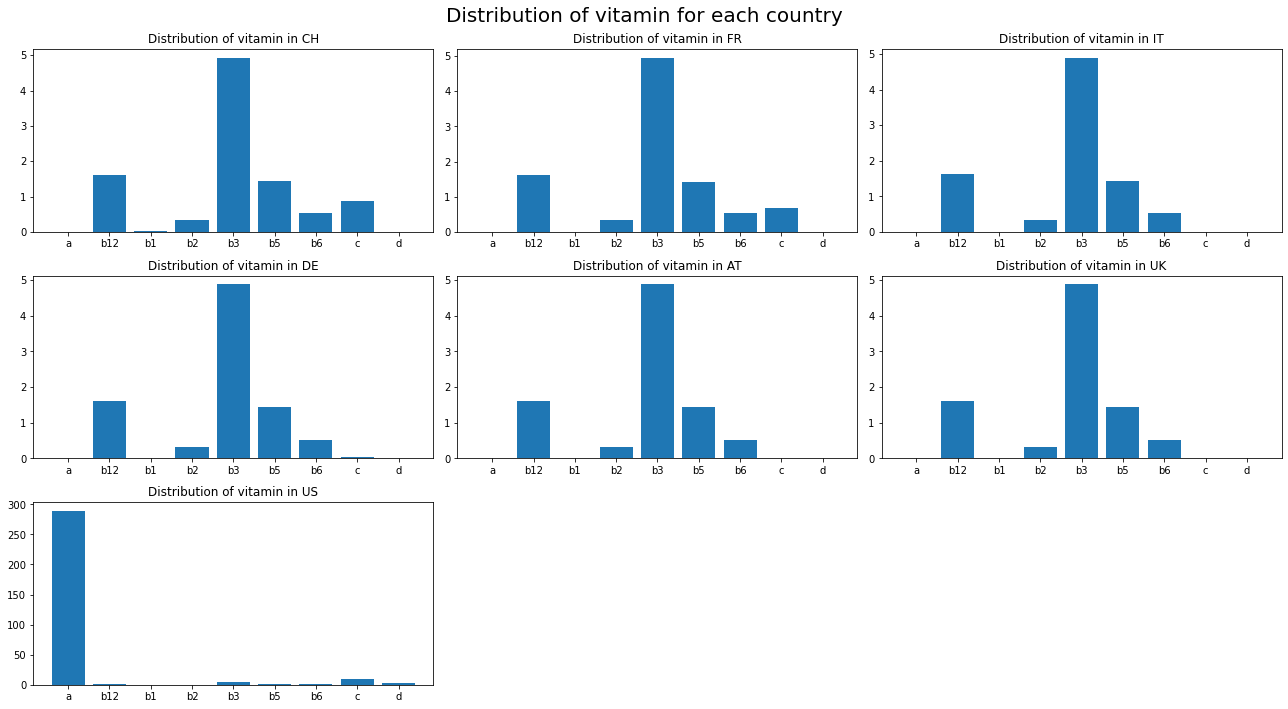

In [29]:
x_cor=['a','b12','b1','b2','b3','b5','b6','c','d']
f = plt.figure(figsize=(18, 10))

for country in (country_list):
    subplot = f.add_subplot(3, 3, country_list.index(country)+1)
    plt.bar(x_cor, mean_df[country])
    plt.title('Distribution of vitamin in '+ country)

plt.suptitle(
    "Distribution of vitamin for each country",
    fontsize=20,
)
f.tight_layout()

plt.show()

We can observe that the a vitamin is very very used in the US, while in other country, it is absolutely not. In the other country, the most common vitamin is the b3 vitamin

Now let's take a look at the most cmmon additives in the database.

In [30]:
df['ingredients_en'].head()

0    Superior quality durum wheat Pasta\r\n\r\nIngr...
1                 Bio Milk (Switzerland), kitchen salt
2                                 100%  coffee Arabica
3    Powdered chocolate 99% (sugar, cocoa), emulsif...
4    cocoa paste * (Honduras), raw cane sugar * (Pa...
Name: ingredients_en, dtype: object

Let's focus on one entrie in order to have an idea.

In [31]:
df['ingredients_en'].sample()

171807    SUGAR, ENRICHED BLEACHED WHEAT FLOUR (WHEAT FL...
Name: ingredients_en, dtype: object

So we can see that this s what compose the product. Now let's look for addidtives. for example, let's look for the e415.

In [32]:
df[df['ingredients_en'].str.contains('e415')]

,index,alcohol_by_volume,barcode,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_per_portion,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,...,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit
52901,52901,0.0,00075391010570,49.0,mg,16.96,15.6,g,58.0,mg,...,1.43,mg,0.52,mg,1.8,mg,0.0,IU,2.73,mg


New let's look for every additives that matches.

In [33]:
df[df['ingredients_en'].str.contains('e{1}\s?\d+a?')].shape

(4080, 100)

In [34]:
df['ingredients_en'].shape[0]

374884

We can see that we have 4080 rows with additives inside.

We now will find ever additivs of the dataframe.

In [35]:
additive_list=[]

for i in range (df['ingredients_en'].shape[0]):
    additive=re.findall('e{1}\s?\d+a?',df['ingredients_en'][i])
    additive_list=additive_list+additive
len(additive_list)

5020

In [36]:
additive_serie=pd.Series(additive_list)
additive_serie.unique() # Checking different additives

array(['e 99', 'e 0', 'e 2', 'e 25', 'e 9', 'e 4', 'e 51', 'e 42', 'e 33',
       'e 7', 'e 17', 'e 15', 'e 3', 'e 1', 'e 13', 'e 71', 'e 39',
       'e 21', 'e 10', 'e 19', 'e 35', 'e 96', 'e 75', 'e 72', 'e 43',
       'e 6', 'e 30', 'e 27', 'e 22', 'e 28', 'e 70', 'e 34', 'e 45',
       'e 20', 'e 5', 'e 40', 'e 37', 'e 41', 'e 32', 'e 48', 'e 49',
       'e 24', 'e 11', 'e 79', 'e 23', 'e 16', 'e 12', 'e 47', 'e13',
       'e 100', 'e 65', 'e 38', 'e 55', 'e 69', 'e 31', 'e 14', 'e 18',
       'e300', 'e 54', 'e2', 'e 8', 'e 50', 'e 80', 'e 59', 'e 60',
       'e 52', 'e 26', 'e 68', 'e 95', 'e 89', 'e 36', 'e 61', 'e 78',
       'e 67', 'e 262', 'e 53', 'e 63', 'e 200', 'e 450', 'e 93', 'e 90',
       'e 237', 'e 165', 'e 215', 'e 185', 'e 197', 'e 220', 'e 204',
       'e 196', 'e 250', 'e 240', 'e 255', 'e 150', 'e 190', 'e 62',
       'e 57', 'e 74', 'e 235', 'e 260', 'e 140', 'e 135', 'e 64', 'e471',
       'e 87', 'e 94', 'e 58', 'e 98', 'e 46', 'e 812', 'e 630', 'e 1050',
  

We now have seen all the different additives of the dataframe. Now let's see what are the most common ones.

In [37]:
additive_serie.value_counts().head(15)

e 1      919
e 0      292
e 4      225
e 5      210
e 2      200
e 3      175
e 14     165
e 20     147
e 28     145
e 23     127
e 405    127
e 8      126
e 7      122
e 13     115
e 99      99
dtype: int64

We can clearly see that the e 1 is very use. We will now check if there are countries with more or less risky additives

In [38]:
risky_data=pd.read_csv('risky_additives.csv') # First look at the data
risky_data.isnull().sum()

Additive      0
Risk        507
dtype: int64

In [39]:
risky_data.shape # Check the shape

(573, 2)

We can see that there are null values, which give us no information, we therefore will drop them

In [40]:
risky_data.dropna(inplace=True)
risky_data

,Additive,Risk
8,E202 - Potassium sorbate,High risk of over exposure
9,E450 - Diphosphates,High risk of over exposure
10,E407 - Carrageenan,High risk of over exposure
12,E250 - Sodium nitrite,High risk of over exposure
13,E129 - Allura red ac,No or very low risk of over exposure
...,...,...
481,E493 - Sorbitan monolaurate,High risk of over exposure
510,E213 - Calcium benzoate,High risk of over exposure
532,E434 - Polyoxyethylene sorbitan monopalmitate,Moderate risk of over exposure
545,E227 - Calcium bisulphite,High risk of over exposure


In [41]:
risky_data.shape

(66, 2)

The new shape is really diferent as we drop about 500 rows on 573.

After taking a look at the 'risk' column, we will check the different level of risk.

In [42]:
unique=risky_data['Risk'].unique()
unique

array(['High risk of over exposure',
       'No or very low risk of over exposure',
       'Moderate risk of over exposure'], dtype=object)

So we have three different levels of risk, as you can see above. In order to do estimation about many additives, let's change thise into grades out of ten: the bigger the grade is, the more riskt the additive is.

In [43]:
risky_data.replace(unique[0], 9, inplace=True)
risky_data.replace(unique[1], 1, inplace=True)
risky_data.replace(unique[2], 5, inplace=True)
risky_data.head(15)

,Additive,Risk
8,E202 - Potassium sorbate,9
9,E450 - Diphosphates,9
10,E407 - Carrageenan,9
12,E250 - Sodium nitrite,9
13,E129 - Allura red ac,1
18,E150c - Ammonia caramel,5
21,E133 - Brilliant blue FCF,5
22,E341 - Calcium phosphates,9
23,E211 - Sodium benzoate,9
30,E621 - Monosodium glutamate,9


In [44]:
risky_data.head(10) # Taking a look at the new DataFrame

,Additive,Risk
8,E202 - Potassium sorbate,9
9,E450 - Diphosphates,9
10,E407 - Carrageenan,9
12,E250 - Sodium nitrite,9
13,E129 - Allura red ac,1
18,E150c - Ammonia caramel,5
21,E133 - Brilliant blue FCF,5
22,E341 - Calcium phosphates,9
23,E211 - Sodium benzoate,9
30,E621 - Monosodium glutamate,9


Let's now create some lists with all the additives of a country inside them

In [45]:
df.groupby('country').size() # Number of product per countries

country
AT         1
CH     33117
DE     10639
FR       118
IT      2719
UK         1
US    328289
dtype: int64

In [46]:
additif_par_country=[]

for countries in country_list:
    df_per_country=df.groupby('country').get_group(countries).reset_index()
    additif_liste=[]
    
    for i in range (df_per_country['ingredients_en'].shape[0]):
        additives=re.findall('e{1}\s?\d+a?',df_per_country['ingredients_en'][i])
        additif_liste=additif_liste+additives
        additif_liste=pd.Series(additif_liste)
        additif_liste=additif_liste.astype(str).str.replace(' ','')
        additif_liste=additif_liste.str.upper()
        additif_liste=additif_liste.tolist()
    
    additif_par_country.append(additif_liste)

/var/folders/mk/q507z2ts3294t2g0662rr7100000gn/T/ipykernel_40045/1567606780.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  additif_liste=pd.Series(additif_liste)


We now have a list containing 7 lists of every additives of the seven differents coountries

As you can see above, Austria and UK just have one product. Therefore, we will not consider them for our analysis.

In [47]:
del(additif_par_country[4:6]) # Deleting UK and AT

In [48]:
risky_df=risky_data['Additive'].str.replace('-','')
risky_df=risky_data['Additive'].str.replace('[^E0-9]','')
risky_df

/var/folders/mk/q507z2ts3294t2g0662rr7100000gn/T/ipykernel_40045/2285822140.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  risky_df=risky_data['Additive'].str.replace('[^E0-9]','')


8      E202
9      E450
10     E407
12     E250
13     E129
       ... 
481    E493
510    E213
532    E434
545    E227
549    E495
Name: Additive, Length: 66, dtype: object

In [49]:
dictionnaire=dict(zip(risky_df, risky_data['Risk']))

In [50]:
mean_list=[]

for i in range(len(additif_par_country)):
    mean_list+=pd.Series([*map(dictionnaire.get, additif_par_country[i])]).dropna().mean()

In [51]:
mean_list

array([], dtype=float64)

In [52]:
CH=pd.Series([*map(dictionnaire.get, additif_par_country[0])]).dropna().mean()
FR=pd.Series([*map(dictionnaire.get, additif_par_country[1])]).dropna().mean()
IT=pd.Series([*map(dictionnaire.get, additif_par_country[2])]).dropna().mean()
DE=pd.Series([*map(dictionnaire.get, additif_par_country[3])]).dropna().mean()
US=pd.Series([*map(dictionnaire.get, additif_par_country[4])]).dropna().mean()

Now let's create a dataframe holding all the 'risk grades' of each country.

In [53]:
grades=[[CH],[FR],[IT],[DE],[US]]
del(country_list[4:6])
pd.DataFrame(grades, index=country_list)

,0
CH,8.811765
FR,NaN
IT,NaN
DE,NaN
US,9.000000


As we can see, the risky additives csv doesn't provide us enough information.

D: Text Data

In this part, we will again focus on the ingredient column. Let's see what an ingredients lisyt look like.


In [54]:
df['ingredients_en'].sample()

369201    CHICKPEA TORTILLA CHIPS (CHICKPEAS, TAPIOCA FL...
Name: ingredients_en, dtype: object

At the first look we can see that the ingredients are all separated by a comma

First, let's look for the product has the longest ingredients list

In [55]:
df['ingredients_en'].apply(lambda x: len(x.split(','))).sort_values(ascending=False).head(1)

350670    188
Name: ingredients_en, dtype: int64

We can see that it is the product at the index 51629, with 536 words in the list. Let's discover which porduct it is.

In [56]:
df['ingredients_en'][51629].split(',')

['Arcoiris: Enriched Flour (Wheat Flour',
 ' Niacinamide',
 ' Ferrous Fumarate',
 ' Thiamin Mononitrate',
 ' Riboflavin',
 ' Folic Acid)',
 ' Sugar',
 ' High Fructose Corn Syrup',
 ' Corn Syrup',
 ' Vegetable Oil Blend (Palm Oil',
 ' Sunflower Oil and/or Canola Oil and/or Soybean Oil',
 ' [Contains Ascorbyl Palmitate',
 ' Tocopherols and TBHQ as Preservatives])',
 ' Coconut (with Sodium Metabisulfite [Preservative])',
 ' Corn Starch',
 ' Contains 2% or Less of: Gelatin',
 ' Soy Flour',
 ' Salt',
 ' Leavening Agents (Sodium Bicarbonate',
 ' Ammonium Bicarbonate',
 ' Aluminum Sodium Sulfate)',
 ' Artificial Flavor',
 ' Soy Lecithin',
 ' Propylene Glycol Monostearate',
 ' FD&C Red 3',
 ' FD&C Red 40',
 ' FD&C Yellow 5',
 ' FD&C Yellow 6',
 ' FD&C Blue 1',
 ' Glyceryl Monostearate',
 ' Hydrolyzed Soy Protein',
 ' Sodium Stearoyl Lactylate',
 ' Calcium Sulfate',
 ' Zinc Oxide',
 ' Sodium Hexametaphosphate',
 ' Caramel Color. CONTAINS WHEAT',
 ' COCONUT',
 ' AND SOY INGREDIENTS. MAY CONTAIN 

It is the product above, we now look for the shortest list

In [57]:
df['ingredients_en'].apply(lambda x: len(x.split())).sort_values().head(20)

177018    1
122334    1
122335    1
171207    1
171205    1
57775     1
347213    1
366650    1
171095    1
122432    1
366651    1
57759     1
57709     1
57941     1
279622    1
279643    1
366661    1
57687     1
366667    1
366668    1
Name: ingredients_en, dtype: int64

We can see that there are many products with just one word in the ingredients list. Let's find how many we can find

In [58]:
len(df['ingredients_en'][df['ingredients_en'].apply(lambda x: len(x.split())).sort_values()==1])

6762

There are 6762 product with just on word as a lis of ingredients.

Now let's find what are the most common ingredients. In order to do this, we must first 'clear' the texts. We'll first need to remove all the words that we call 'stop word in english'. These words are words that give us no information. E.g: the, in...

In [59]:
import nltk

nltk.download("stopwords", quiet=True)

from nltk.corpus import stopwords

stopwords_english = stopwords.words("english")

In [60]:
def preprocess_text(text):
    clean_text = text.lower() # Converting all the word to lowercase
    
    clean_text = re.sub(r"[,.()]"," ", clean_text) # Replacing ponctuation with whitespace
    
    clean_text = re.sub(r"\s-\s"," ", clean_text) # Replacing hyphens with whitespace
    
    processed_sample_tokens = [tok for tok in clean_text.split() if tok not in stopwords_english] # Removing stop words
    
    return processed_sample_tokens

In [61]:
clean_df=[preprocess_text(text) for text in df['ingredients_en']]

In [62]:
len(clean_df)

374884

To find the most common ingrediens, we are just going to create a big 'list' of strings holding every ingredients of every product and then look for the most commons ingredients.

In [63]:
big_list=[]

for i in range (len(clean_df)):
    big_list+=clean_df[i]

In [64]:
Counter(big_list).most_common(25)

[('salt', 377566),
 ('sugar', 279107),
 ('oil', 263501),
 ('acid', 251941),
 ('water', 225417),
 ('flour', 212333),
 ('milk', 200384),
 ('natural', 188974),
 ('corn', 187268),
 ('organic', 171473),
 ('sodium', 164760),
 ('wheat', 155740),
 ('flavor', 135394),
 ('powder', 131201),
 ('syrup', 120369),
 ('soy', 113587),
 ('gum', 111976),
 ('starch', 109496),
 ('citric', 102847),
 ('vitamin', 90338),
 ('cheese', 90028),
 ('color', 84676),
 ('juice', 84597),
 ('lecithin', 82605),
 ('cocoa', 78024)]

We can now see the 25 most common ingredients. It is pretty much normal that the most common ingredients are sugar, salt, oil...

E: TIME SERIE DATA

Now we'll work on the time series data.

Let's take a look at the 'created at' column.

In [65]:
df['created_at']

0         2016-06-01T11:42:22.908Z
1         2016-06-01T11:42:25.111Z
2         2016-06-01T11:42:25.900Z
3         2016-06-01T11:42:26.184Z
4         2016-06-01T11:42:26.350Z
                    ...           
374879    2021-10-04T14:08:42.215Z
374880    2021-10-04T14:12:06.476Z
374881    2021-10-04T14:22:10.685Z
374882    2021-10-04T14:27:36.157Z
374883    2021-10-04T16:10:49.085Z
Name: created_at, Length: 374884, dtype: object

We can see that the dtypes is object. Therefore, we are going to change this to date time. 

In [66]:
date_column=pd.to_datetime(df['created_at'].str.replace('T',' ').str.replace('Z',''))

In [122]:
date_column.head()

0   2016-06-01 11:42:22.908
1   2016-06-01 11:42:25.111
2   2016-06-01 11:42:25.900
3   2016-06-01 11:42:26.184
4   2016-06-01 11:42:26.350
Name: created_at, dtype: datetime64[ns]

Great! Now that we have transformed this into date time series, let's draw a heatmap that show the number of items created at each month-hour pair.

In [68]:
def to_hours(dates):
    heures=dates.hour
    return heures

hours=[to_hours(dates) for dates in date_column]

In [69]:
def to_month(dates):
    mois=dates.month
    return mois

month=[to_month(dates) for dates in date_column]

In [70]:
zipped_dates=zip(month,hours)
dates_pairs=list(zipped_dates)

In [71]:
zeros=np.zeros((12,24))

In [72]:
for k in range (len(dates_pairs)):
    zeros[dates_pairs[k][0]-1,dates_pairs[k][1]-1]+=1

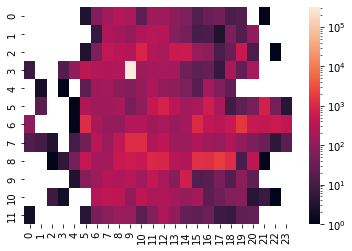

In [73]:
sns.heatmap(zeros, norm = LogNorm())
plt.show()

We can see that almost every products have been created on april, around 9 a.m.

In [74]:
def to_period(dates):
    periods=pd.Period(dates, freq="M")
    return periods

period=sorted(pd.Series([to_period(dates) for dates in date_column]).unique())

In [75]:
CH_matrix=np.zeros((len(period)))
DE_matrix=np.zeros((len(period)))
FR_matrix=np.zeros((len(period)))
IT_matrix=np.zeros((len(period)))
US_matrix=np.zeros((len(period)))
matrix_list=[CH_matrix,DE_matrix,FR_matrix,IT_matrix,US_matrix]
matrix_list[3]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [76]:
country_array=np.delete(df['country'].unique(),[4,5])
country_array

array(['CH', 'FR', 'IT', 'DE', 'US'], dtype=object)

In [77]:
df['created_at'].groupby(df['country']).get_group('FR')

22325     2018-03-14T08:04:20.636Z
22327     2018-03-14T08:18:43.016Z
22328     2018-03-14T08:33:35.042Z
22329     2018-03-14T08:43:45.439Z
22330     2018-03-14T08:48:38.379Z
                    ...           
374734    2021-09-24T06:51:03.593Z
374747    2021-09-24T10:08:16.351Z
374748    2021-09-24T10:57:31.761Z
374760    2021-09-24T18:48:19.370Z
374773    2021-09-26T18:33:11.546Z
Name: created_at, Length: 118, dtype: object

In [120]:
numbers=[0,1,2,3,4]

for pays,n in zip(country_array,numbers):
    group_country=pd.to_datetime(df['created_at'].groupby(df['country']).get_group(pays+'').str.replace('T',' ').str.replace('Z',''))
    group_country.reset_index(drop=True,inplace=True)
    for i in range (len(group_country)):
        date=pd.Period(group_country[i], freq="M")
        for j in range (len(period)):
            if period[j]==date:
                matrix_list[n][j]+=1

No handles with labels found to put in legend.


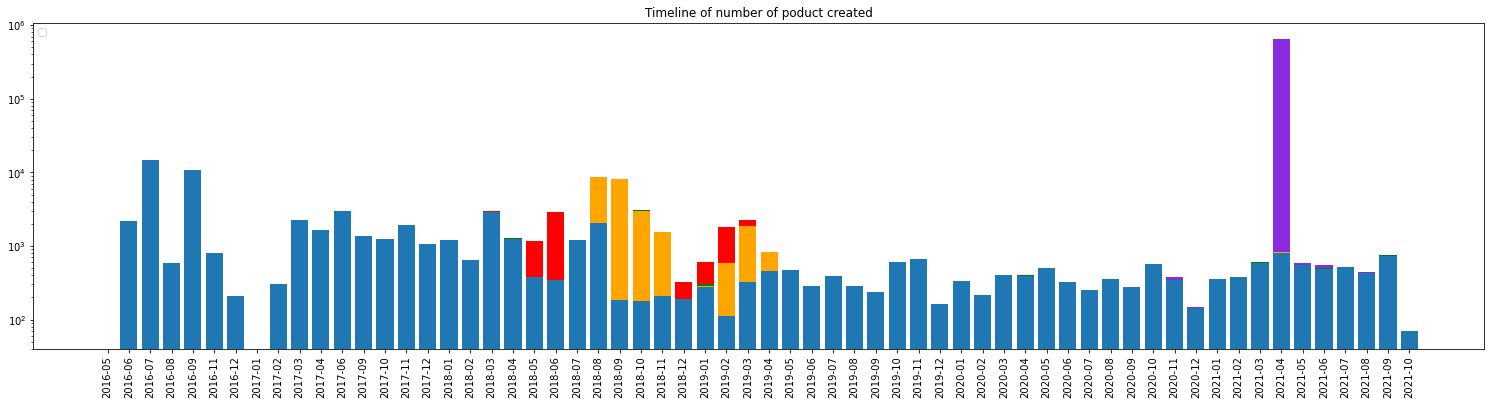

In [128]:
plt.figure(figsize=(26,6))
plt.yscale("log")
plt.bar(np.arange(len(period)), matrix_list[0])
plt.bar(np.arange(len(period)), matrix_list[3], color="orange", bottom=matrix_list[0])
plt.bar(np.arange(len(period)), matrix_list[1], color="green", bottom=matrix_list[3] + matrix_list[0])
plt.bar(np.arange(len(period)), matrix_list[2], color="red", bottom=matrix_list[1] + matrix_list[3] + matrix_list[0])
plt.bar(np.arange(len(period)), matrix_list[4], color="blueviolet", bottom=matrix_list[2] + matrix_list[1] + matrix_list[3] + matrix_list[0])
plt.xticks(np.arange(len(period)),period, rotation=90)
plt.title('Timeline of number of poduct created')
plt.legend(loc='upper left')
plt.show()

F. Correlation analysis

Now our task will be to find the correlation between the numerical columns and the energy per hundred column.

In [80]:
df[per_hundred_list]

,calcium_per_hundred,carbohydrates_per_hundred,cholesterol_per_hundred,copper_cu_per_hundred,energy_kcal_per_hundred,energy_per_hundred,fat_per_hundred,fatty_acids_total_saturated_per_hundred,fatty_acids_total_trans_per_hundred,fiber_insoluble_per_hundred,...,vitamin_a_iu_per_hundred,vitamin_b12_cobalamin_per_hundred,vitamin_b1_thiamin_per_hundred,vitamin_b2_riboflavin_per_hundred,vitamin_b3_niacin_per_hundred,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b6_pyridoxin_per_hundred,vitamin_c_ascorbic_acid_per_hundred,vitamin_d_d2_d3_international_units_per_hundred,zinc_per_hundred
0,36.0,75.00,0.0,0.48,359.0,1500.00,0.42,2.0,0.0,3.0,...,0.0,1.62,0.00,0.33,4.88,1.43,0.52,0.0,0.0,2.73
1,36.0,1.50,0.0,0.48,242.0,1010.00,18.00,2.0,0.0,3.0,...,0.0,1.62,0.00,0.33,4.88,1.43,0.52,0.0,0.0,2.73
2,36.0,52.68,0.0,0.48,325.0,1358.30,12.08,2.0,0.0,3.0,...,0.0,1.62,0.00,0.33,4.88,1.43,0.52,0.0,0.0,2.73
3,36.0,70.40,0.0,0.48,402.0,1679.00,7.90,2.0,0.0,3.0,...,0.0,1.62,0.00,0.33,4.88,1.43,0.52,0.0,0.0,2.73
4,36.0,37.00,0.0,0.48,591.0,2470.00,44.00,2.0,0.0,3.0,...,0.0,1.62,0.00,0.33,4.88,1.43,0.52,0.0,0.0,2.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374879,36.0,23.53,0.0,0.48,267.0,1117.13,5.45,2.0,0.0,3.0,...,0.0,1.62,0.00,0.33,4.88,1.43,0.52,0.0,0.0,2.73
374880,850.0,48.60,0.0,0.48,285.0,1210.00,0.05,2.0,0.0,3.0,...,0.0,18.75,8.25,10.50,120.00,45.00,10.50,500.0,0.0,37.50
374881,36.0,22.00,0.0,0.48,584.0,2418.00,46.00,2.0,0.0,3.0,...,0.0,1.62,0.00,0.33,4.88,1.43,0.52,0.0,0.0,2.73
374882,36.0,23.53,0.0,0.48,267.0,1117.13,5.45,2.0,0.0,3.0,...,0.0,1.62,0.00,0.33,4.88,1.43,0.52,0.0,0.0,2.73


In [81]:
correlation_list=[]

for column in per_hundred_list:
    correlation=abs(df['energy_per_hundred'].corr(df[column]))
    correlation_list.append(correlation)

Now let's create a dataframe holding all the correlations.

In [82]:
DATA=np.asarray(correlation_list).reshape(1,37)
corr_df=pd.DataFrame(DATA, index=['correlation_with_energy_per_hundred'], columns=[per_hundred_list])

In [83]:
corr_df # Displaying he dataframe

,calcium_per_hundred,carbohydrates_per_hundred,cholesterol_per_hundred,copper_cu_per_hundred,energy_kcal_per_hundred,energy_per_hundred,fat_per_hundred,fatty_acids_total_saturated_per_hundred,fatty_acids_total_trans_per_hundred,fiber_insoluble_per_hundred,...,vitamin_a_iu_per_hundred,vitamin_b12_cobalamin_per_hundred,vitamin_b1_thiamin_per_hundred,vitamin_b2_riboflavin_per_hundred,vitamin_b3_niacin_per_hundred,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b6_pyridoxin_per_hundred,vitamin_c_ascorbic_acid_per_hundred,vitamin_d_d2_d3_international_units_per_hundred,zinc_per_hundred
correlation_with_energy_per_hundred,0.0384,0.506816,0.007862,0.000241,0.725782,1.0,0.747531,0.499583,0.042554,0.015892,...,0.019694,0.002696,0.003706,0.001093,0.001097,0.003018,0.003326,0.01462,0.001911,0.004605


Great, now we will try to show the real relationship, so we will therefore plot the three most correlated and the three least correlated.

But first we are going to drop the column that shows the correlation with energy per hundred, as we know that the value is 1.

In [84]:
corr_df.drop('energy_per_hundred', axis=1, inplace=True)

In [85]:
corr_df.drop('energy_kcal_per_hundred', axis=1, inplace=True)

In [86]:
most_correlated=corr_df.T.sort_values(by=['correlation_with_energy_per_hundred'], ascending=False).head(3) # Displaying the most corralated
most_correlated

,correlation_with_energy_per_hundred
fat_per_hundred,0.747531
carbohydrates_per_hundred,0.506816
fatty_acids_total_saturated_per_hundred,0.499583


In [87]:
least_correlated=corr_df.T.sort_values(by=['correlation_with_energy_per_hundred'], ascending=True).head(3) # Displaying the least corralated
least_correlated

,correlation_with_energy_per_hundred
copper_cu_per_hundred,0.000241
vitamin_b2_riboflavin_per_hundred,0.001093
vitamin_b3_niacin_per_hundred,0.001097


Now let's plot those correlation using scatter plot

/Users/etienneleguay/opt/anaconda3/envs/adsml/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/etienneleguay/opt/anaconda3/envs/adsml/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/etienneleguay/opt/anaconda3/envs/adsml/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit 

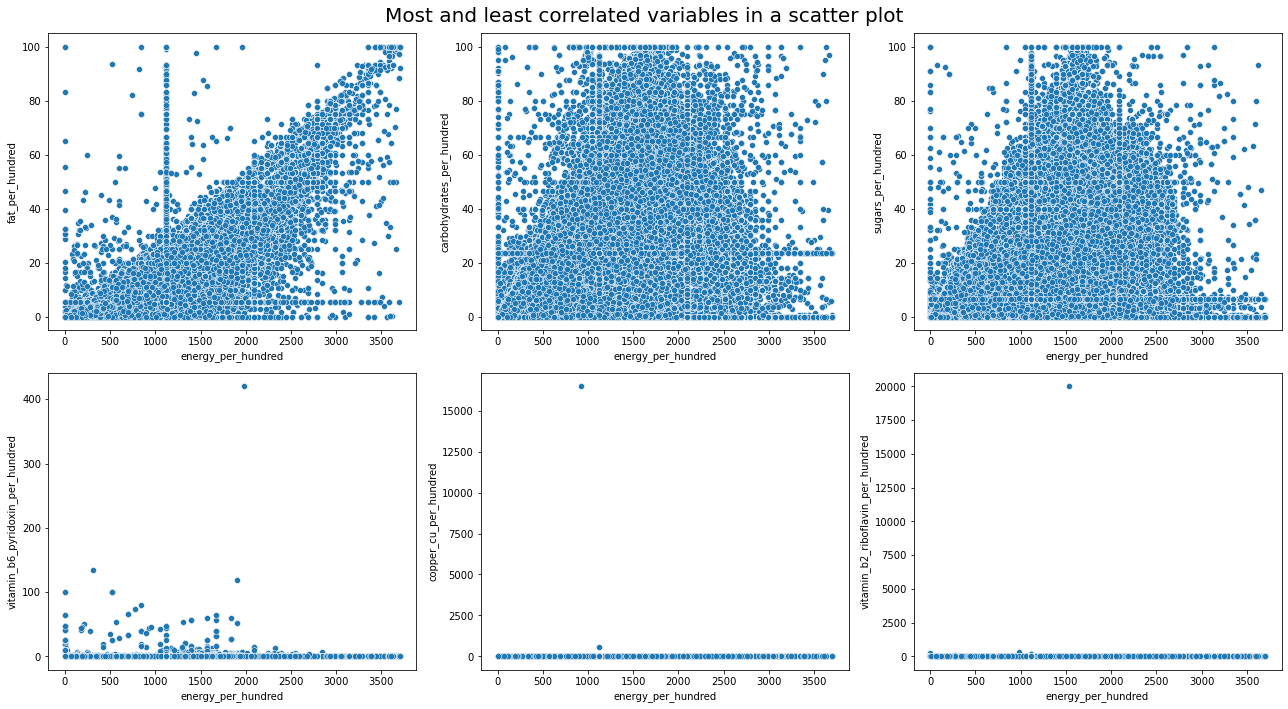

In [102]:
correlations_list=['fat_per_hundred','carbohydrates_per_hundred','sugars_per_hundred','vitamin_b6_pyridoxin_per_hundred',
                   'copper_cu_per_hundred','vitamin_b2_riboflavin_per_hundred']
fig = plt.figure(figsize=(18, 10))

for corr in (correlations_list):
    subplot = fig.add_subplot(2, 3, correlations_list.index(corr)+1)
    sns.scatterplot(df.energy_per_hundred,df[corr],data=corr_df)

plt.suptitle(
    "Most and least correlated variables in a scatter plot",
    fontsize=20,
)
fig.tight_layout()

plt.show()

Indeed, they're not all linear, as we can see above. We can spot extremes values on the three plot of the least correlated variables, but even once removed it would not change anything.

In [90]:
df['energy_per_hundred'].median()

1117.13

We will now try to test the independance of two categorical variables, by trying to turn the energy per hundred column into a categorical variables. To do that, we are going to create three different levels: low energy, medium energy and high energy.

In order to determine which values correspond to which level, let's focus on the energy_per_hundred column.

In [91]:
df['energy_per_hundred'].describe()

count    374884.000000
mean       1121.203320
std         745.930953
min           0.000000
25%         435.140000
50%        1117.130000
75%        1644.310000
max        3700.000000
Name: energy_per_hundred, dtype: float64

First, we can see that the median and the mean values are pretty much close. We can imagine 3 different levels that are 0 to 800, 800 to 1200 to 1600

In [112]:
def energy_function(energy):
    if energy<=800:
        energy='low energy'
    else:
        if energy<=1200:
            energy ='medium energy'
        else:
            if energy>1200:
                energy='high energy'
            
    return energy

In [113]:
energy_df=[energy_function(energy) for energy in df['energy_per_hundred']]

In [114]:
df['energy_str']=energy_df

In [115]:
energy_grouped=df['energy_str'].groupby(df.country)
energy_grouped.describe()

,count,unique,top,freq
country,,,,
AT,1,1,low energy,1
CH,33117,3,medium energy,13898
DE,10639,3,medium energy,9743
FR,118,3,medium energy,76
IT,2719,3,medium energy,2470
UK,1,1,low energy,1
US,328289,3,high energy,146729


Now, that we have replaced the number by those categories, let's investigate on if the level of energy in the product is associated with the country where the product is produced. To do that we could have find the percentage of product that comes from any country, but that would not be the best way, because some country have way more product that other countries. Therefore we are going to plot the proportion of low, meidum and high energy product in each country.

In [116]:
grouped_country=df.groupby('country')

In [117]:
grouped_country.get_group('US').groupby('energy_str').count()['index'].index.tolist()

['high energy', 'low energy', 'medium energy']

In [118]:
grouped_country.get_group(country).groupby('energy_str').count()['index']

energy_str
high energy      10333
low energy        8886
medium energy    13898
Name: index, dtype: int64

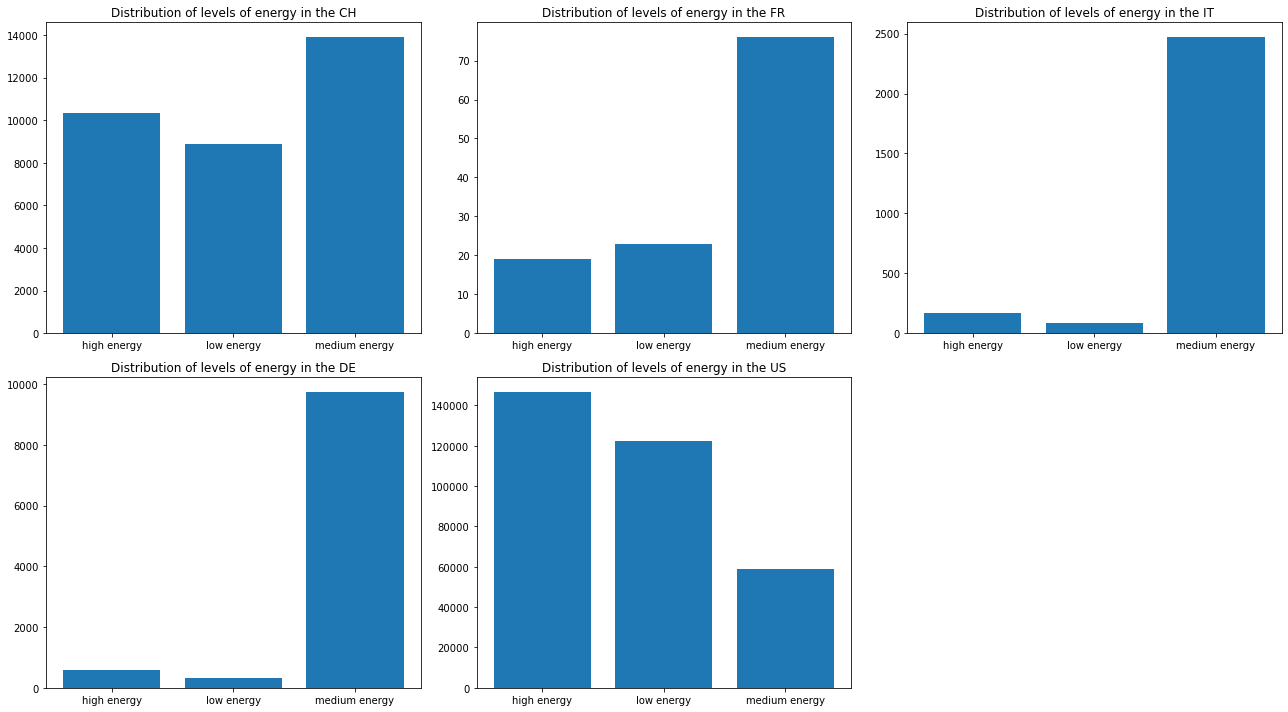

In [119]:
figure=plt.figure(figsize=(18, 10))

for country in country_list:
    subplot = figure.add_subplot(2, 3, country_list.index(country)+1)
    plt.bar(grouped_country.get_group(country).groupby('energy_str').count()['index'].index.tolist(),
            grouped_country.get_group(country).groupby('energy_str').count()['index'])
    plt.title('Distribution of levels of energy in the '+country)

figure.tight_layout()

Finally, we can see that if a product comes from Germany or Italie, it is very probable that this is a medium energy level product. However, if it comes from United states, it is less probable, as the major proportion of product are high and low energy level product.